# *ReAct*, a useful program to understand Gillespie algorithm

# Core functions

A brief descriptions of what these functions do

* ***ReAct***: the main function. Returns the deterministic and Gillespie solutions for the concentration of all the chemical species in time. It also prints the reactions of the system.
    * Input:
        * Initial concentration of all chemical species involved in the system, provided as a list of length 2xN, where N is the number of chemical species in the system. The concentration of each chemical species is defined by groups of 2 consecutive elements in a list: $[R_{i},n_{R_{i}},R_{i+1},n_{R_{i+1}},...,R_{n},n_{R_{n}} ]$
        * Reactions: The reactions writen as a tuple of size 3xN, where N is an int. Each reaction in the system is defined by 3 consecutive elements of the tuple:
            1. Tuple of reactants (R<sub>i</sub>,SI<sub>i</sub>,R<sub>i+1</sub>,SI<sub>i+1</sub>,...,R<sub>n</sub>,SI<sub>n</sub>), where n is the number of reactants, R<sub>i</sub> is the name of reactant "i" as a string, and SI<sub>i</sub> is the stoichiometric index.
          
                * Note: Those familiar with metabolic pathways or other biochemical reactions systems probably
                 have frequently encountered chemical reactions represented like in Fig.1. In this MAP cascade,
                 for reaction 1 (the one with k1), the reaction speed depends on the concentration of MAP3K and
                 receptor; however, the receptor is not a reactive nor a product of the reaction, it acts like an
                 enzyme/catalizer for the reaction. For an accurate representation of this chemical reaction, we would
                 need a Michaelis-Menten-like description: E+S<->ES-E+P. However, in the description of these 
                 reactions in textbooks or papers we often find only one kynetic constant. This simplification is a 
                 good approximation if the reaction limitting step is the association of the enzyme with the 
                 substrate, and the second reaction is much faster than the association(go to Michaelis-Menten to see 
                 this). However, this poses a problem for the way this program works: in the stoichiometry matrix, the
                 value for receptor in this reaction is 0 when we write the reaction receptor+S->receptor+P.
                 
                 $\left[ \begin{array}{cc}
                 receptor & 0 \\
                 MAP3K    & -1\\
                 MAP3KP   & +1\\ \end{array} \right]$
                 
                 To overcome this problem, to specify that a chemical species acts as an enzime/catalizer as described 
                 before, we include it as one of the reactants in the reaction tuple, and we set the stoichiometry
                 index to -1, for instance this rection would be described as follows: 
                 $('receptor',-1,'MAP3K',1),('MAP3KP',1),k1$

            2. Tuple of products, in the same way as the reactives
            
            3. The reaction constant, as a numb
        * Time: a np.array containing the time points for which you want to calculate the integration for the deterministic solution. Gillespie will run from the first value until the time exceeds the last value.
        * Mode: by default, it is 0. If mode=0, calculate the Gillespie and deterministic solution; if mode=1, only deterministic; if mode=2, only Gillespie.
* ***DetSol***: this function is called by *ReAct*, and calculates the deterministic solution, if you want to understand how it works, see the python code in the cell below.
* ***Gillespy***: this function is called by *ReAct*, and calculates the Gillespie solution, if you want to understand how it works, see the python code in the cell below. If you do so, you will see that both functions take the same arguments, and behave in a very similar way, with small differences. If you know the basics of programming, a look at these functions would be very useful to understand the differences between the two methods.
* ***Gillesplot***: plots the calculated solutions. 
    * Input:
        * The first 6 arguments *(solution,t,tgill, valsgill,rows,mode)* are the output of the *ReAct* function (check the code for propper understanding). The next optional argument is a list of strings with the names of the chemical species that you want to represent, for instance $[R_1,R_3]$, will plot only the concentrations of R<sub>1</sub> and RR<sub>3</sub>.
<img src="Images/miniMAP.png" style="width: 200px;"/>
**Figure 1**: MAP kinase cascade, as frequently depicted in textbooks

In the following cell, I include a useful function: It will print the python code from your files in the Jupyter cell. This is very useful, since you probably want to edit your important files in an external editor, save them, and bring them to Jupyter. Copy-paste is always a bad idea, like this you can make sure that the code displayed in the notebook is the same as the one you have in the file. However, if you want to change something in the code, you will have to change in the file (you cannot edit the code in jupyter, since it is just printed in the cell). With this function, the code in your file will be output in the end, with the code coloured as in Jupyter.

Also, if you change something in the file, and you want that change to be applied in the notebook, you will have to restart the kernel! (Running the same file again won't make a difference)

In [1]:
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter

import IPython
def PrintPythonFile(filename):

    f = open(filename) 
    code = f.read()

    formatter = HtmlFormatter()
    return IPython.display.HTML('<style type="text/css">{}</style>{}'.format(
        formatter.get_style_defs('.highlight'),
        highlight(code, PythonLexer(), formatter)))

*Gilles.py* is the file that contains the important functions, we will go through it to understand the main differences between the deterministic and stochastic solution, but first let's see some examples!

In [2]:
%run Gilles.py

Here we can see some examples for the use of *ReAct*

['1A'] --k0[]--> ['1B']
['1B'] --k1[]--> ['1A']


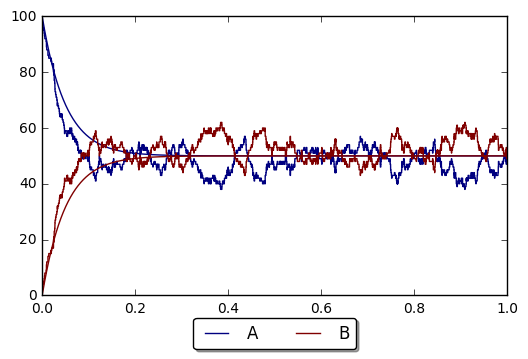

In [3]:
%run 'Example1_oscillations.py'
PrintPythonFile('Example1_oscillations.py')

Is this oscilatory effect only? If we change the number of molecules of A from 100 to 1000 what do we see? How could we quantify the relevance of this oscilations with respect to the equilibrium?

['1A'] --k0[]--> ['1B']
['1B'] --k1[]--> ['1A']


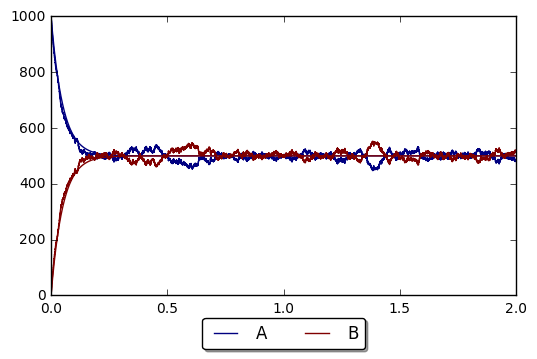

In [4]:
%run 'Example2_Ask4Oscillations.py'
PrintPythonFile('Example2_Ask4Oscillations.py')

You can copy the content of the file into a new cell, and change the values, explore how the parameters affect the outcome using the cell below.

['1A'] --k0[]--> ['1B']
['1B'] --k1[]--> ['1A']


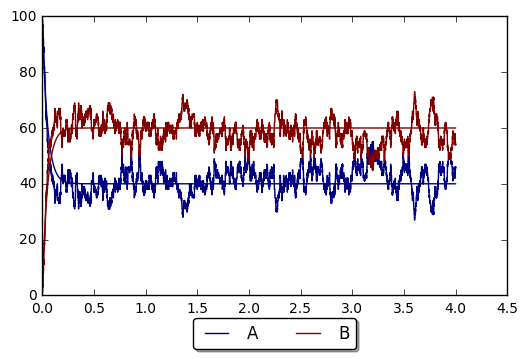

In [5]:
# Initial conditions
user_input = ['A', 100,
              'B', 0]
# Constants (this is not necessary, they could be filled up already in the reaction tuple)
k = (12,8)

# Reaction template ((stoch_1,reactant_1,stoch_2,reactant_2),(stoch_1,product_1,stoch_2,product_2),k)
reactions = (
    (1,'A'),(1,'B'),k[0],
    (1,'B'),(1,'A'),k[1],
)
# dt is used for the deterministic calculation, and the
dt=0.0001
t = np.arange(0, 4, dt)

(solution,(tgill, valsgill, _, _),rows,mode)=ReAct(user_input,reactions,t)

Gillesplot(solution,t,tgill, valsgill,rows,mode)

plt.show()

Now, let's look at a maybe more relevant situation for biologists, the already mentioned MAP kinase cascade.
<img src="Images/miniMAP.png" style="width: 200px;"/>
Kinase cascades are known for amplifying the signal: a minor change in the cell, for example, a transient activation of a small number of receptors, is amplified by the cascade and results in major changes in the cell state. Have a look at the example below, do we see this effect?

The first graph is a bit crowded, so we can choose to plot only the most relevant species for us.
The second graph shows how the Map1K is strongly amplified, explore how the parameters (initial concentrations and kynetic constants) affect the outcome of the response in the cell below. Try to find a link with the explained role of kinase cascades.

['1Rec'] --k0[]--> []
['11M3'] --k1['1Rec']--> ['11M3P']
['11M3P'] --k2[]--> ['11M3']
['11M2'] --k3['11M3P']--> ['11M2P']
['11M2P'] --k4[]--> ['11M2']
['11M1'] --k5['11M2P']--> ['11M1P']
['11M1P'] --k6[]--> ['11M1']


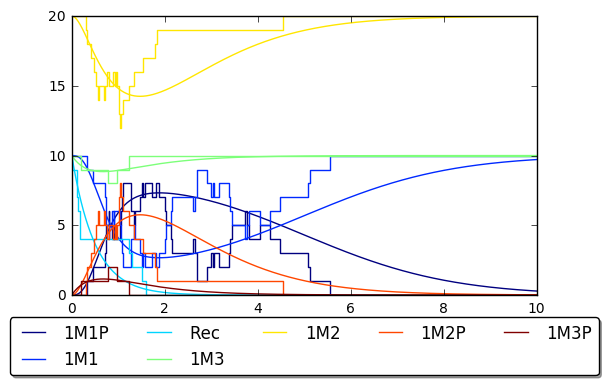

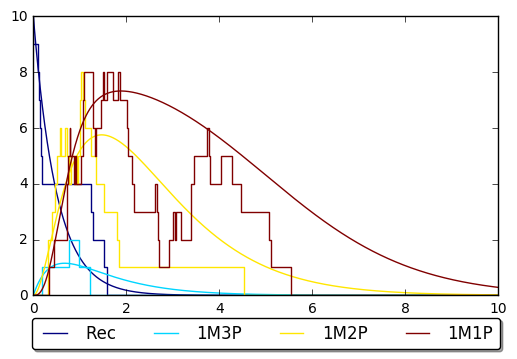

In [6]:
%run 'Example3_KyneticCascade.py'
PrintPythonFile('Example3_KyneticCascade.py')

Explore how the parameters (initial concentrations and kynetic constants) affect the outcome of the response in the cell below. Try to find a link with the explained role of kinase cascades.

['1Rec'] --k0[]--> []
['11M3'] --k1['1Rec']--> ['11M3P']
['11M3P'] --k2[]--> ['11M3']
['11M2'] --k3['11M3P']--> ['11M2P']
['11M2P'] --k4[]--> ['11M2']
['11M1'] --k5['11M2P']--> ['11M1P']
['11M1P'] --k6[]--> ['11M1']


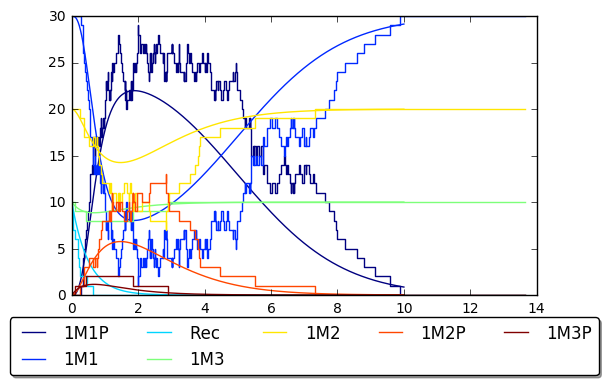

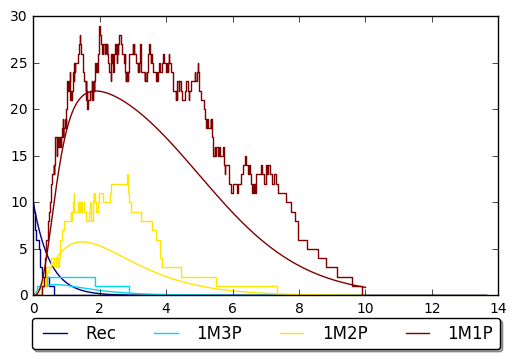

In [9]:
import numpy as np
from Gilles import *
import matplotlib.pyplot as plt

# Initial conditions
user_input = ['Rec', 10,
              '1M3', 10,
              '1M3P', 0,
              '1M2', 20,
              '1M2P', 0,
              '1M1', 30,
              '1M1P', 0]

# Constants (this is not necessary, they could be filled up already in the reaction tuple)
k = (2,0.05,1,0.5,1,0.5,1)

# Reaction template ((stoch_1,reactant_1,stoch_2,reactant_2),(stoch_1,product_1,stoch_2,product_2),k)
reactions = (
    (1,'Rec'),(),k[0],
    (-1,'Rec',1,'1M3'),(1,'1M3P'),k[1],
    (1,'1M3P'),(1,'1M3'),k[2],
    (-1,'1M3P',1,'1M2'),(1,'1M2P'),k[3],
    (1,'1M2P'),(1,'1M2'),k[4],
    (-1, '1M2P', 1, '1M1'), (1, '1M1P'), k[5],
    (1, '1M1P'), (1, '1M1'), k[6],
)
# dt is used for the deterministic calculation, and the
dt=0.00001
t = np.arange(0, 10, dt)

(solution,(tgill, valsgill, _, _),rows,mode)=ReAct(user_input,reactions,t)


Gillesplot(solution,t,tgill, valsgill,rows,mode)
plt.figure()
Gillesplot(solution,t,tgill, valsgill,rows,mode,['Rec','1M3P','1M2P','1M1P'])
plt.show()

# The predator-pray model

Also known as Lotka–Volterra equations:

<img src="Images/Lotka_volterra.svg" style="width: 150px;"/>

Where, x is the number of preys , and y is the number of predators. Before looking at the next cell, how would you write these equations as a chemical reaction?

What does each reaction represent

[] --k0['1Prey']--> ['1Prey']
['1Prey'] --k1['1Pred']--> []
[] --k2['1Pred', '1Prey']--> ['1Pred']
['1Pred'] --k3[]--> []


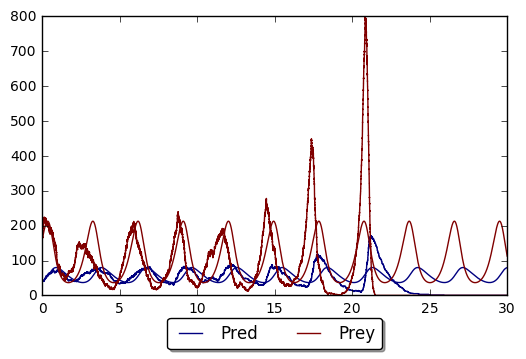

In [8]:
%run 'Example_PredatorPray.py'
PrintPythonFile('Example_PredatorPray.py')